# GO-CAM AI Demo with Noctua Screenshots

This notebook demonstrates GO-CAM manipulation with automatic screenshot capture of the Noctua web interface.

## Prerequisites

1. Chrome or Firefox browser installed
2. ChromeDriver or GeckoDriver installed:
   ```bash
   # macOS with Homebrew
   brew install chromedriver
   # or
   brew install geckodriver
   ```

3. Required Python packages:
   ```bash
   uv add selenium pillow
   ```

## Setup

In [ ]:
import os
from pathlib import Path
from IPython.display import Image, display, HTML

from noctua.barista import BaristaClient
from noctua.noctua_screenshots import NoctuaScreenshotCapture

# Ensure BARISTA_TOKEN is set in your environment
# For development: Contact the GO team for a dev token  
# For production: Get token from Noctua login
if not os.environ.get("BARISTA_TOKEN"):
    print("ERROR: BARISTA_TOKEN environment variable not set")
    print("Please set: export BARISTA_TOKEN=your-token-here")
    raise SystemExit(1)

# Create screenshots directory
screenshots_dir = Path("screenshots")
screenshots_dir.mkdir(exist_ok=True)

print("Environment configured")
print(f"Screenshots will be saved to: {screenshots_dir.absolute()}")

## Create Model and Initialize Screenshot Capture

We'll create a new model and open it in Noctua for visual tracking.

In [2]:
# Create Barista client
client = BaristaClient()

# Create a new model
response = client.create_model(title="Visual Demo: Signal Transduction Pathway")
if not response.ok:
    print(f"Failed to create model: {response.raw}")
    raise Exception("Could not create model")

model_id = response.model_id
print(f"Created model: {model_id}")

# Get the Noctua URL with token
token = os.environ.get("BARISTA_TOKEN", "")
noctua_url = f"http://noctua-dev.berkeleybop.org/editor/graph/{model_id}"
if token:
    noctua_url += f"?barista_token={token}"
print(f"\nNoctua URL: {noctua_url}")
display(HTML(f'<a href="{noctua_url}" target="_blank">Open in Noctua</a>'))

Created model: gomodel:68d6f96e00000294

Noctua URL: http://noctua-dev.berkeleybop.org/editor/graph/gomodel:68d6f96e00000294?barista_token=0wikitmf1vch103exckj


## Initialize Screenshot Capture

This will open a browser window to track changes. Set `headless=True` to run without GUI.

Error sending stats to Plausible: error sending request for url (https://plausible.io/api/event)


Browser started successfully


Timeout waiting for Noctua editor to load


Model opened in browser
Initial screenshot saved


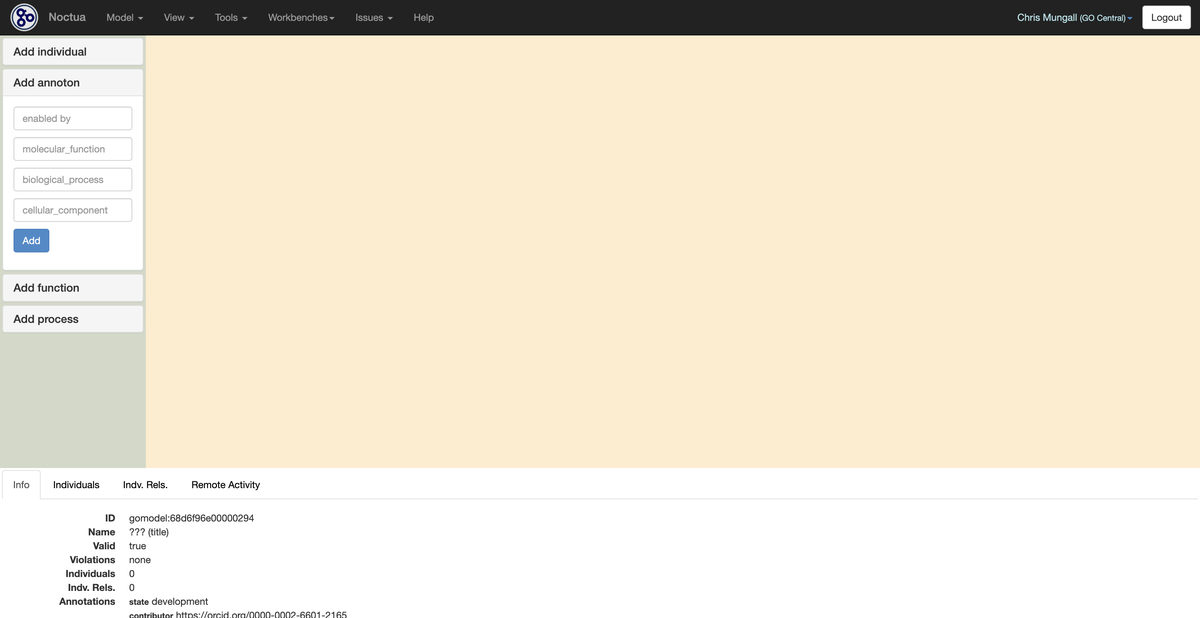

In [3]:
# Initialize screenshot capture
# Note: Set headless=True to run without opening a browser window
capture = NoctuaScreenshotCapture(
    headless=False,  # Set to True for headless mode
    screenshot_dir="screenshots",
    dev_mode=True
)

try:
    capture.start()
    print("Browser started successfully")
    
    # Open the model in Noctua
    if capture.open_model(model_id, wait_time=8):
        print("Model opened in browser")
        
        # Take initial screenshot
        initial_screenshot = capture.capture(
            filename="01_empty_model.png",
            description="Empty model"
        )
        
        if initial_screenshot:
            print("Initial screenshot saved")
            display(Image(initial_screenshot, width=800))
    else:
        print("Could not open model in browser")
        print("Make sure Chrome/Firefox and appropriate driver are installed")
        
except Exception as e:
    print(f"Error setting up browser: {e}")
    print("Continuing without screenshots...")
    capture.close()
    capture = None

## Step 1: Add Molecular Functions

Add molecular function nodes and capture screenshots after each addition.

Adding receptor activity...
Added receptor: gomodel:68d6f96e00000294/68d6f96e00000295


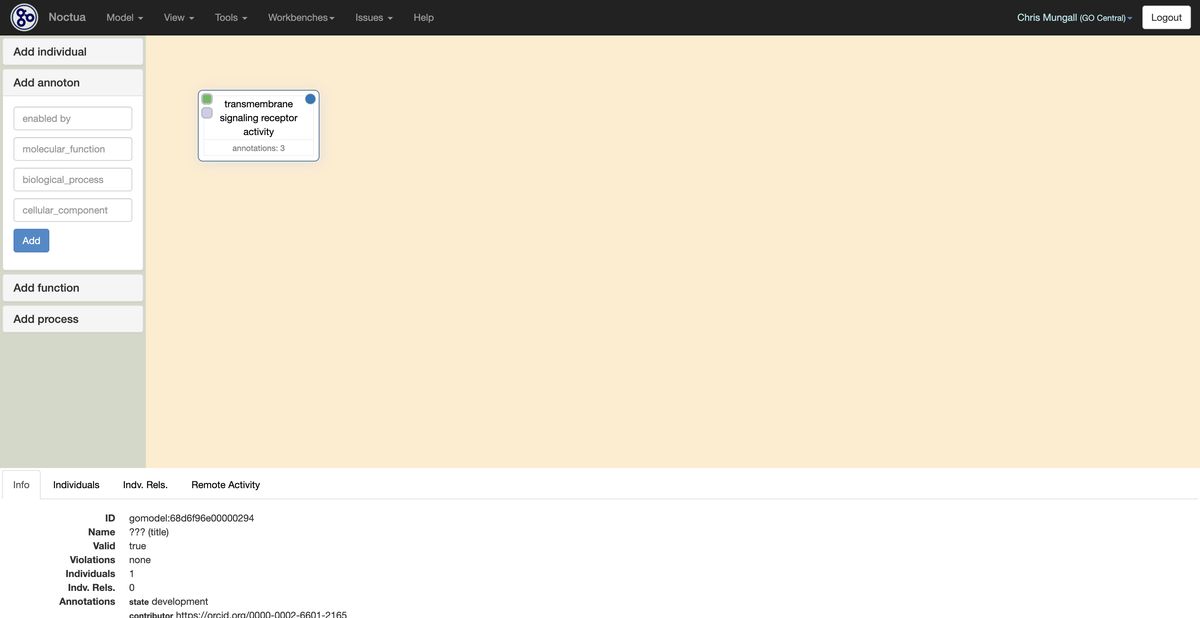

In [4]:
# Store individual IDs for later use
individuals = {}

# Add receptor activity
print("Adding receptor activity...")
response = client.add_individual(
    model_id,
    "GO:0004888",  # transmembrane signaling receptor activity
    assign_var="receptor"
)

if response.ok:
    # Find the added individual
    for ind in response.individuals:
        types = ind.get("type", [])
        for t in types:
            if t.get("id") == "GO:0004888":
                individuals["receptor"] = ind["id"]
                print(f"Added receptor: {ind['id']}")
                break
    
    # Refresh and screenshot
    if capture:
        capture.refresh_model(wait_time=3)
        screenshot = capture.capture(
            filename="02_receptor_added.png",
            description="After adding receptor"
        )
        if screenshot:
            display(Image(screenshot, width=800))

Adding GTPase activity...
Added GTPase: gomodel:68d6f96e00000294/68d6f96e00000296


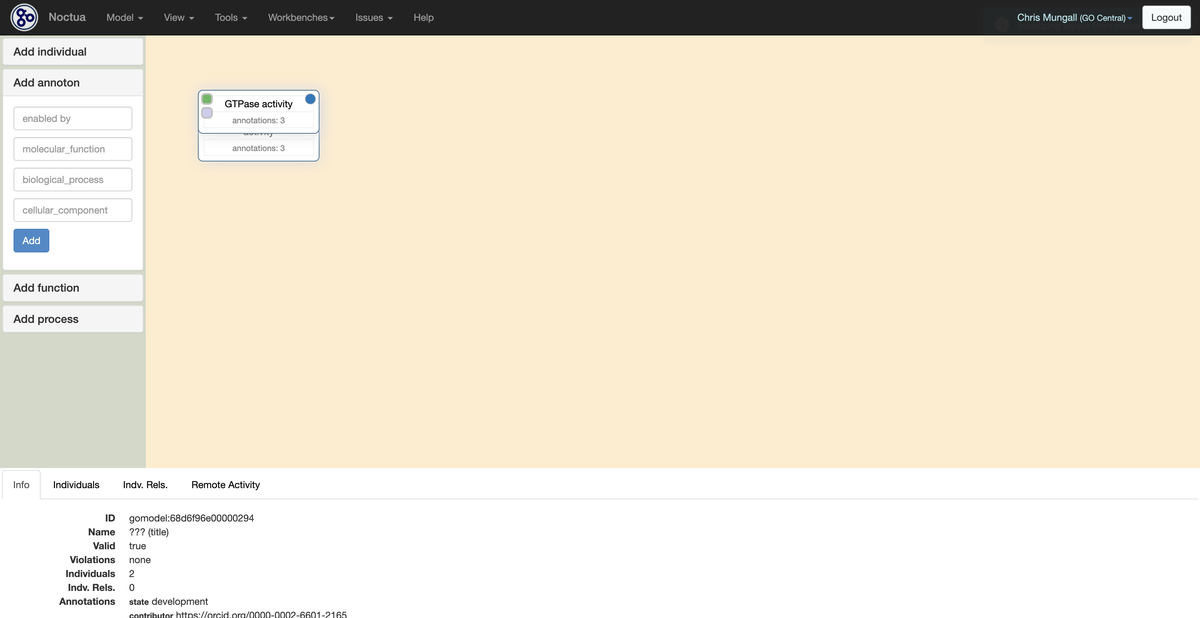

In [5]:
# Add GTPase activity
print("Adding GTPase activity...")
response = client.add_individual(
    model_id,
    "GO:0003924",  # GTPase activity
    assign_var="gtpase"
)

if response.ok:
    for ind in response.individuals:
        types = ind.get("type", [])
        for t in types:
            if t.get("id") == "GO:0003924":
                individuals["gtpase"] = ind["id"]
                print(f"Added GTPase: {ind['id']}")
                break
    
    if capture:
        capture.refresh_model(wait_time=3)
        screenshot = capture.capture(
            filename="03_gtpase_added.png",
            description="After adding GTPase"
        )
        if screenshot:
            display(Image(screenshot, width=800))

Adding kinase activity...
Added kinase: gomodel:68d6f96e00000294/68d6f96e00000297


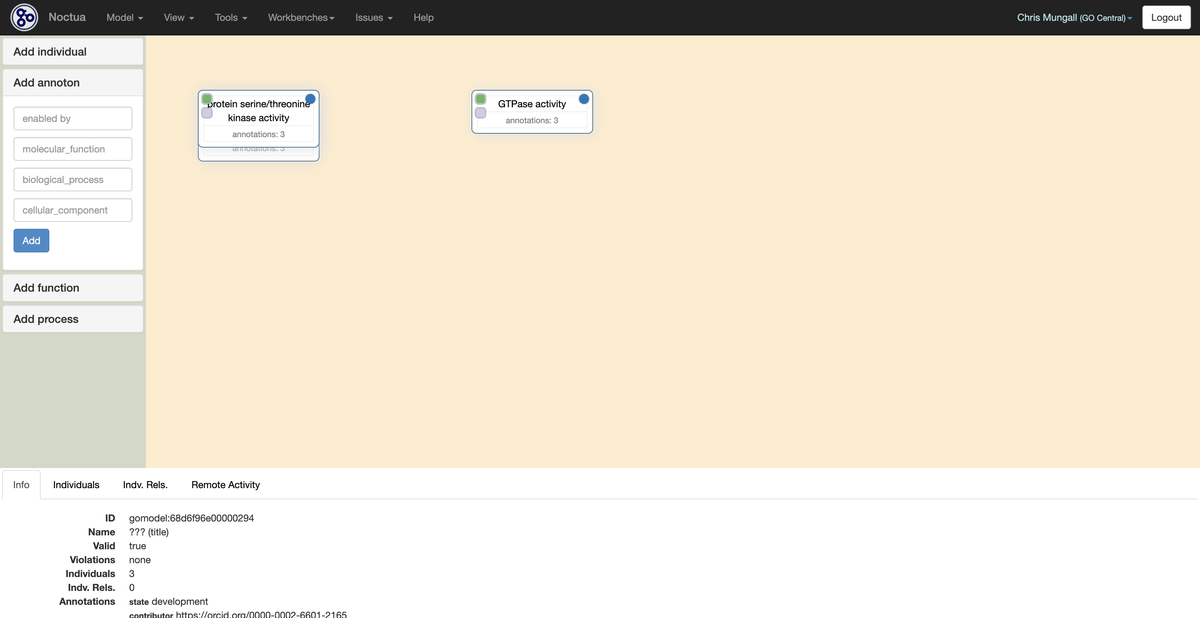

In [6]:
# Add kinase activity
print("Adding kinase activity...")
response = client.add_individual(
    model_id,
    "GO:0004674",  # protein serine/threonine kinase activity
    assign_var="kinase"
)

if response.ok:
    for ind in response.individuals:
        types = ind.get("type", [])
        for t in types:
            if t.get("id") == "GO:0004674":
                individuals["kinase"] = ind["id"]
                print(f"Added kinase: {ind['id']}")
                break
    
    if capture:
        capture.refresh_model(wait_time=3)
        screenshot = capture.capture(
            filename="04_kinase_added.png",
            description="After adding kinase"
        )
        if screenshot:
            display(Image(screenshot, width=800))

## Step 2: Add Causal Relationships

Connect the molecular functions with regulatory relationships.

Adding edge: Receptor -> GTPase
Edge added successfully


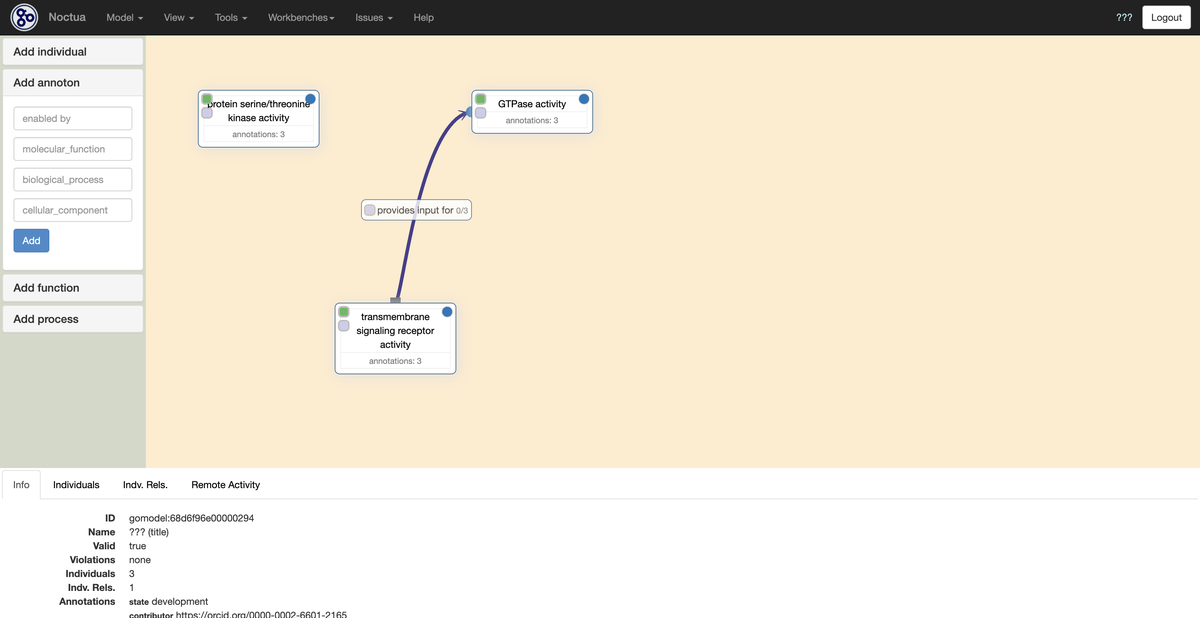

In [7]:
# Add edge: Receptor -> GTPase
if "receptor" in individuals and "gtpase" in individuals:
    print("Adding edge: Receptor -> GTPase")
    response = client.add_fact(
        model_id,
        subject_id=individuals["receptor"],
        object_id=individuals["gtpase"],
        predicate_id="RO:0002413"  # directly positively regulates
    )
    
    if response.ok:
        print("Edge added successfully")
        
        if capture:
            capture.refresh_model(wait_time=3)
            screenshot = capture.capture(
                filename="05_receptor_to_gtpase.png",
                description="After adding Receptor->GTPase edge"
            )
            if screenshot:
                display(Image(screenshot, width=800))

Adding edge: GTPase -> Kinase
Edge added successfully


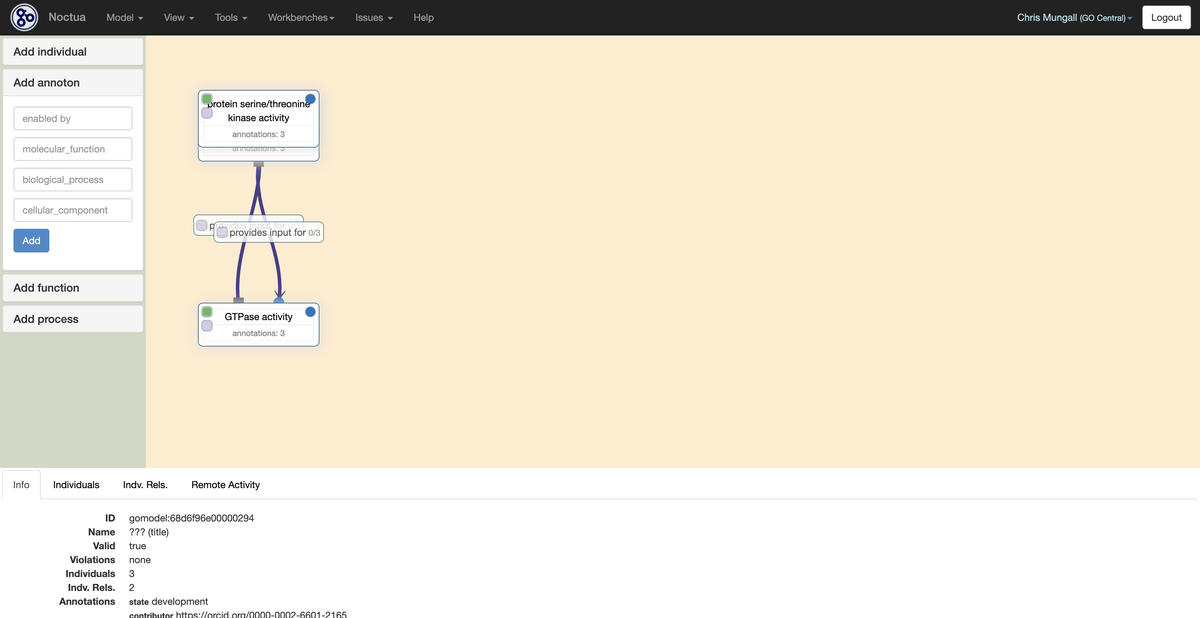

In [8]:
# Add edge: GTPase -> Kinase
if "gtpase" in individuals and "kinase" in individuals:
    print("Adding edge: GTPase -> Kinase")
    response = client.add_fact(
        model_id,
        subject_id=individuals["gtpase"],
        object_id=individuals["kinase"],
        predicate_id="RO:0002413"  # directly positively regulates
    )
    
    if response.ok:
        print("Edge added successfully")
        
        if capture:
            capture.refresh_model(wait_time=3)
            screenshot = capture.capture(
                filename="06_gtpase_to_kinase.png",
                description="After adding GTPase->Kinase edge"
            )
            if screenshot:
                display(Image(screenshot, width=800))

## Step 3: Add Evidence

Add evidence annotation to support the relationships.

Adding evidence to GTPase->Kinase edge...
Evidence added successfully


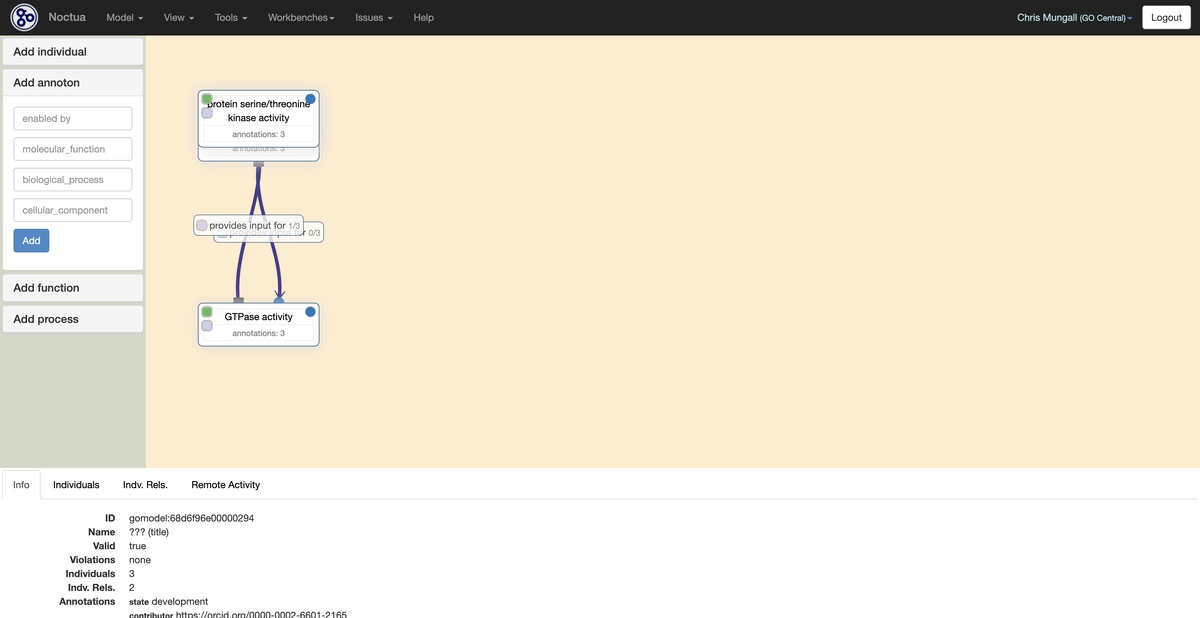

In [9]:
# Add evidence to GTPase->Kinase edge
if "gtpase" in individuals and "kinase" in individuals:
    print("Adding evidence to GTPase->Kinase edge...")
    
    evidence_requests = client.req_add_evidence_to_fact(
        model_id,
        subject_id=individuals["gtpase"],
        object_id=individuals["kinase"],
        predicate_id="RO:0002413",
        eco_id="ECO:0000314",  # direct assay evidence
        sources=["PMID:12345678", "PMID:87654321"],
        with_from=["UniProtKB:P01112"]  # HRAS
    )
    
    response = client.m3_batch(evidence_requests)
    
    if response.ok:
        print("Evidence added successfully")
        
        if capture:
            capture.refresh_model(wait_time=3)
            screenshot = capture.capture(
                filename="07_evidence_added.png",
                description="After adding evidence"
            )
            if screenshot:
                display(Image(screenshot, width=800))

## Step 4: View Complete Model

Final screenshot of the complete model.

Final model state:
- Model ID: gomodel:68d6f96e00000294
- Individuals: 4
- Facts: 2

Final model visualization:


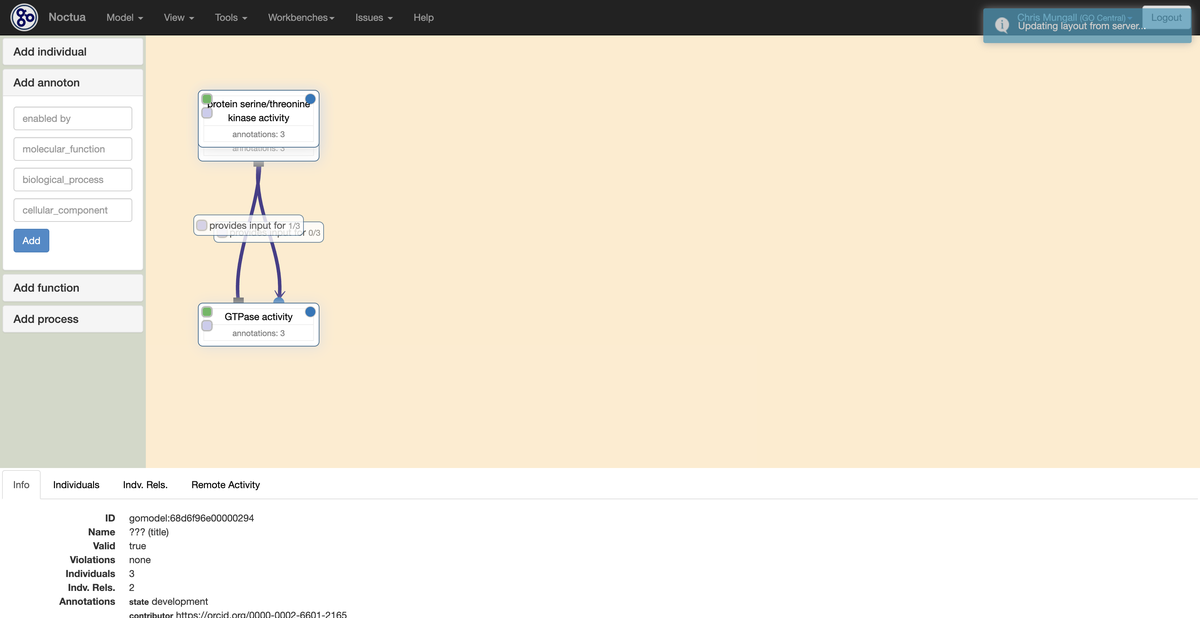

In [10]:
# Get final model state
response = client.get_model(model_id)

if response.ok:
    print("Final model state:")
    print(f"- Model ID: {response.model_id}")
    print(f"- Individuals: {len(response.individuals)}")
    print(f"- Facts: {len(response.facts)}")
    
    if capture:
        # Take a final screenshot
        screenshot = capture.capture(
            filename="08_complete_model.png",
            description="Complete model"
        )
        if screenshot:
            print("\nFinal model visualization:")
            display(Image(screenshot, width=800))

## Generate Screenshot Gallery

Create an HTML gallery of all screenshots taken during the session.

In [11]:
# Generate gallery of all screenshots
from pathlib import Path

screenshot_files = sorted(Path("screenshots").glob("*.png"))

if screenshot_files:
    html_content = "<h3>Screenshot Gallery</h3>\n"
    html_content += "<div style='display: flex; flex-wrap: wrap;'>\n"
    
    for img_path in screenshot_files:
        html_content += f'''
        <div style='margin: 10px; text-align: center;'>
            <img src='{img_path}' width='300' style='border: 1px solid #ddd;'/>
            <p style='font-size: 12px;'>{img_path.name}</p>
        </div>
        '''
    
    html_content += "</div>\n"
    display(HTML(html_content))
else:
    print("No screenshots found")

## Cleanup

In [12]:
# Close the browser
if capture:
    capture.close()
    print("Browser closed")

print(f"\nModel URL: {noctua_url}")
print(f"Screenshots saved in: {screenshots_dir.absolute()}")

Browser closed

Model URL: http://noctua-dev.berkeleybop.org/editor/graph/gomodel:68d6f96e00000294?barista_token=0wikitmf1vch103exckj
Screenshots saved in: /Users/cjm/repos/noctua-py/docs/examples/screenshots


## Summary

This notebook demonstrated:

1. **Automated Browser Control**: Using Selenium to open and control Noctua
2. **Visual Documentation**: Capturing screenshots at each step of model construction
3. **API + UI Sync**: Showing how API changes appear in the Noctua interface
4. **Complete Workflow**: From empty model to fully annotated pathway with evidence

The screenshots provide visual documentation of the model building process, useful for:
- Training materials
- Documentation
- Debugging model construction
- Quality assurance

### Tips

- Use `headless=True` for automated pipelines
- Adjust wait times based on network speed
- Screenshots are automatically saved with descriptive names
- The browser window can be controlled programmatically for zooming, panning, etc.